In [1]:
import pandas as pd
import numpy as np
import fastparquet
import seaborn as sns
import geopandas as gpd
import sys
import os
import matplotlib.pyplot as plt
sys.path.append('C:/Users/thu-bao/Bachelorarbeit/3_Code/NYC_Yellow_Cab_Fare_Prediction/9_Helper_Function')
import Target_Binning
%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
path="F:/1_Bachelorarbeit/1_Daten/1_Yellow_Cab_Trips_2009-June_2016/7_Preprocessing/Without_Feature_Engineering_Without_false_Entry.parquet"
# Testing the Parquet Files
df=pd.read_parquet(path=path,engine="fastparquet")

In [3]:
# use unsupervised learning method k-means to bin Target Variable
df_kmeans_binning=Target_Binning.KMeans_Binning(df,5)

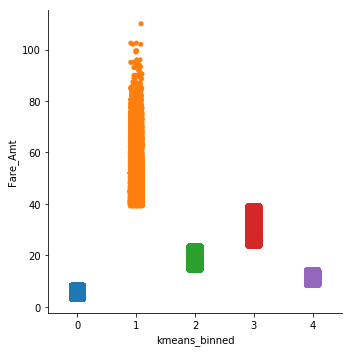

In [4]:
# Show Distribution of the Bins of Target
sns.catplot(x="kmeans_binned", y="Fare_Amt", data=df_kmeans_binning);

In [5]:
category_0=df_kmeans_binning.loc[(df_kmeans_binning["kmeans_binned"]==0)]
category_0.min()

Pickup_DateTime    2009-01-01 00:16:56
Passenger_Count                      1
Pickup_Lon                    -74.2386
Pickup_Lat                     40.5229
Fare_Amt                       3.00004
Dropoff_Lon                   -74.2374
Dropoff_Lat                    40.5146
kmeans_binned                        0
dtype: object

In [6]:
category_0.max()

Pickup_DateTime    2016-06-30 23:54:22
Passenger_Count                      6
Pickup_Lon                    -73.7149
Pickup_Lat                     40.9104
Fare_Amt                       8.37111
Dropoff_Lon                   -73.7082
Dropoff_Lat                    40.9057
kmeans_binned                        0
dtype: object

In [7]:
category_4=df_kmeans_binning.loc[(df_kmeans_binning["kmeans_binned"]==4)]
category_4.min()

Pickup_DateTime    2009-01-01 00:16:50
Passenger_Count                      1
Pickup_Lon                    -74.1992
Pickup_Lat                      40.566
Fare_Amt                       8.37158
Dropoff_Lon                   -74.1726
Dropoff_Lat                    40.5687
kmeans_binned                        4
dtype: object

In [8]:
category_4.max()

Pickup_DateTime    2016-06-30 23:56:08
Passenger_Count                      6
Pickup_Lon                    -73.7147
Pickup_Lat                     40.9066
Fare_Amt                       14.2691
Dropoff_Lon                   -73.7326
Dropoff_Lat                    40.9055
kmeans_binned                        4
dtype: object

In [9]:
category_2=df_kmeans_binning.loc[(df_kmeans_binning["kmeans_binned"]==2)]
category_2.min()

Pickup_DateTime    2009-01-01 00:13:43
Passenger_Count                      1
Pickup_Lon                    -74.1943
Pickup_Lat                     40.5653
Fare_Amt                       14.2744
Dropoff_Lon                   -74.1869
Dropoff_Lat                     40.539
kmeans_binned                        2
dtype: object

In [10]:
category_2.max()

Pickup_DateTime    2016-06-30 23:50:36
Passenger_Count                      6
Pickup_Lon                     -73.706
Pickup_Lat                     40.9011
Fare_Amt                       23.6026
Dropoff_Lon                   -73.7013
Dropoff_Lat                    40.9105
kmeans_binned                        2
dtype: object

In [11]:
category_3=df_kmeans_binning.loc[(df_kmeans_binning["kmeans_binned"]==3)]
category_3.min()

Pickup_DateTime    2009-01-01 00:47:32
Passenger_Count                      1
Pickup_Lon                    -74.1629
Pickup_Lat                     40.5755
Fare_Amt                       23.6328
Dropoff_Lon                   -74.2107
Dropoff_Lat                    40.5361
kmeans_binned                        3
dtype: object

In [12]:
category_3.max()

Pickup_DateTime    2016-06-30 23:44:45
Passenger_Count                      6
Pickup_Lon                    -73.7234
Pickup_Lat                     40.9104
Fare_Amt                       39.2773
Dropoff_Lon                   -73.7032
Dropoff_Lat                    40.9123
kmeans_binned                        3
dtype: object

In [13]:
category_1=df_kmeans_binning.loc[(df_kmeans_binning["kmeans_binned"]==1)]
category_1.min()

Pickup_DateTime    2009-01-01 04:55:19
Passenger_Count                      1
Pickup_Lon                    -74.0779
Pickup_Lat                     40.5756
Fare_Amt                       39.2969
Dropoff_Lon                   -74.2393
Dropoff_Lat                    40.5071
kmeans_binned                        1
dtype: object

In [14]:
category_1.max()

Pickup_DateTime    2016-06-30 23:16:12
Passenger_Count                      6
Pickup_Lon                    -73.7309
Pickup_Lat                     40.9085
Fare_Amt                           110
Dropoff_Lon                    -73.702
Dropoff_Lat                    40.9126
kmeans_binned                        1
dtype: object

#### Observation:
#### The Clustering is no optimal, but we can use it for later reference and must construct own Clusters for the Fare

In [15]:
# use unsupervised learning method k-means to bin Target Variable
df_own_binning_target=Target_Binning.own_binning_target(df,category_0["Fare_Amt"].min()-0.1,category_1["Fare_Amt"].max())

### Distribution of Fare-Bin

In [16]:
df_own_binning_target.head()

,Pickup_DateTime,Passenger_Count,Pickup_Lon,Pickup_Lat,Dropoff_Lon,Dropoff_Lat,Fare_Bin
index,,,,,,,
183041,2009-01-01 00:13:43,2,-74.009254,40.706161,-73.995110,40.760044,1
181137,2009-01-01 00:15:51,1,-73.940910,40.792622,-73.923622,40.743958,1
241421,2009-01-01 00:16:50,4,-73.981300,40.768108,-73.992531,40.751957,1
222602,2009-01-01 00:16:56,1,-73.998840,40.719589,-74.006203,40.714466,0
30701,2009-01-01 00:17:08,2,-73.965240,40.770863,-73.971161,40.766846,0


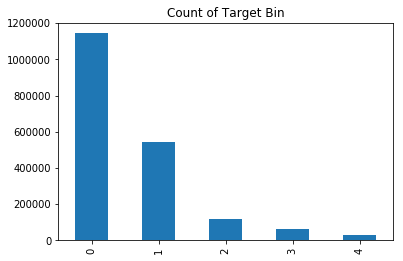

In [17]:
plt.title('Count of Target Bin')
df_own_binning_target["Fare_Bin"].value_counts().plot.bar()

In [18]:
print(str(len(df_own_binning_target.loc[(df_own_binning_target["Fare_Bin"]==0)])/len(df_own_binning_target)*100))
print(str(len(df_own_binning_target.loc[(df_own_binning_target["Fare_Bin"]==1)])/len(df_own_binning_target)*100))
print(str(len(df_own_binning_target.loc[(df_own_binning_target["Fare_Bin"]==2)])/len(df_own_binning_target)*100))
print(str(len(df_own_binning_target.loc[(df_own_binning_target["Fare_Bin"]==3)])/len(df_own_binning_target)*100))
print(str(len(df_own_binning_target.loc[(df_own_binning_target["Fare_Bin"]==4)])/len(df_own_binning_target)*100))

60.338656612853434
28.69927472185359
6.260662169185836
3.2081619515232425
1.493244544583895


In [19]:
df_own_binning_target["Fare_Bin"].value_counts()

0    1143499
1     543890
2     118648
3      60799
4      28299
Name: Fare_Bin, dtype: int64

#### Observation:
#### There is a Class imbalance -> Undersampling,Oversampling, SMOTE

In [20]:
# Convert to parquet for quick reloading
# Set Path for Parquet Files
path="F:/1_Bachelorarbeit/1_Daten/1_Yellow_Cab_Trips_2009-June_2016/8_Feature-Engineering_Transformation"
df_own_binning_target.to_parquet(os.path.join(path, "Without_Feature_Engineering_Without_false_Entry" + "." + "parquet"),engine="fastparquet")